In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [12]:
dt = pd.read_csv('/content/Steam.csv')
dt.head()

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830


In [14]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler
from sklearn.preprocessing import OrdinalEncoder

scaler_mm = MinMaxScaler()

dt[['ncopiesSold']] = scaler_mm.fit_transform(dt[['copiesSold']])
dt[['nprice']] = scaler_mm.fit_transform(dt[['price']])
dt[['nrevenue']] = scaler_mm.fit_transform(dt[['revenue']])
dt[['navgPlaytime']] = scaler_mm.fit_transform(dt[['avgPlaytime']])
dt[['nreviewScore']] = scaler_mm.fit_transform(dt[['reviewScore']])

dt['publisherClass'] = dt['publisherClass'].map({'AAA': 3,'Indie': 2, 'AA': 1,'Hobbyist' : 0})

#dt.head()

#enc = OrdinalEncoder()
#dt[['Genre']] = enc.fit_transform(dt[['Genre']])

dt.drop(columns=['name'], inplace=True)
dt.drop(columns=['publishers'], inplace=True)
dt.drop(columns=['developers'], inplace=True)
dt.drop(columns=['steamId'], inplace=True)
dt.drop(columns=['releaseDate'], inplace=True)
dt.drop(columns=['copiesSold'], inplace=True)
dt.drop(columns=['price'], inplace=True)
dt.drop(columns=['revenue'], inplace=True)
dt.drop(columns=['avgPlaytime'], inplace=True)
dt.drop(columns=['reviewScore'], inplace=True)

dt.head()

,publisherClass,ncopiesSold,nprice,nrevenue,navgPlaytime,nreviewScore
0,3,0.005358,1.00000,0.009590,0.142965,0.71
1,2,0.005180,0.59996,0.009384,0.100060,0.57
2,2,0.006949,0.49995,0.009304,0.042022,0.88
3,2,0.014327,0.19992,0.009234,0.083682,0.76
4,1,0.004578,0.59996,0.009082,0.115608,0.96


In [15]:
vals = dt["publisherClass"].unique()
vals

array([3, 2, 1, 0])

In [16]:
cols_for_clusters = ['ncopiesSold', 'nprice', 'nrevenue', 'navgPlaytime' , 'nreviewScore']

df= dt[cols_for_clusters].copy()

In [17]:
df.head()

,ncopiesSold,nprice,nrevenue,navgPlaytime,nreviewScore
0,0.005358,1.00000,0.009590,0.142965,0.71
1,0.005180,0.59996,0.009384,0.100060,0.57
2,0.006949,0.49995,0.009304,0.042022,0.88
3,0.014327,0.19992,0.009234,0.083682,0.76
4,0.004578,0.59996,0.009082,0.115608,0.96


In [18]:
X = df
y = dt['publisherClass']
yvals = dt['publisherClass']

In [19]:
import mpl_toolkits.mplot3d
from sklearn.cluster import KMeans


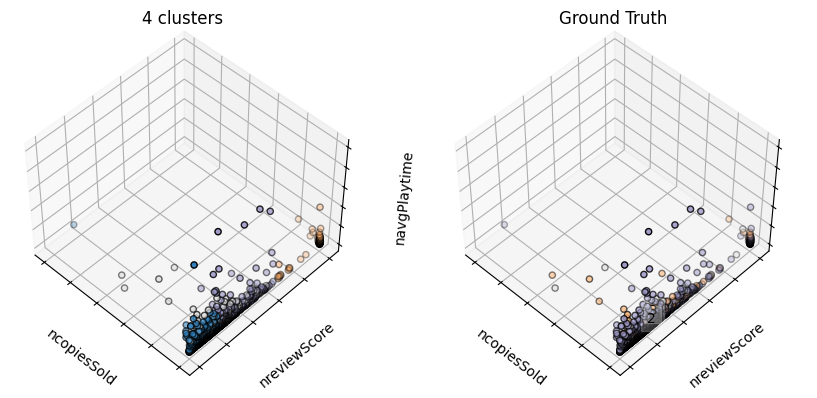

In [55]:
estimators = [
    ("k_means_stress_4", KMeans(n_clusters=4)),
]

fig = plt.figure(figsize=(10, 8))
titles = ["4 clusters"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(1, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["ncopiesSold"], X["nreviewScore"], X["navgPlaytime"], c=labels.astype(float), cmap='tab20c', edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("ncopiesSold")
    ax.set_ylabel("nreviewScore")
    ax.set_zlabel("navgPlaytime")
    ax.set_title(title)

ax = fig.add_subplot(1, 2, 2, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1)]:
    ds = dt[dt["publisherClass"]==name]
    ax.text3D(
        ds["ncopiesSold"].mean(),
        ds["nreviewScore"].mean(),
        ds["navgPlaytime"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["ncopiesSold"], X["nreviewScore"], X["navgPlaytime"], c=y, cmap='tab20c', edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("ncopiesSold")
ax.set_ylabel("nreviewScore")
ax.set_zlabel("navgPlaytime")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [56]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

n_clusters = np.arange(2, 21)


In [57]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.42
Adjusted Rand Index: 0.11


In [49]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n


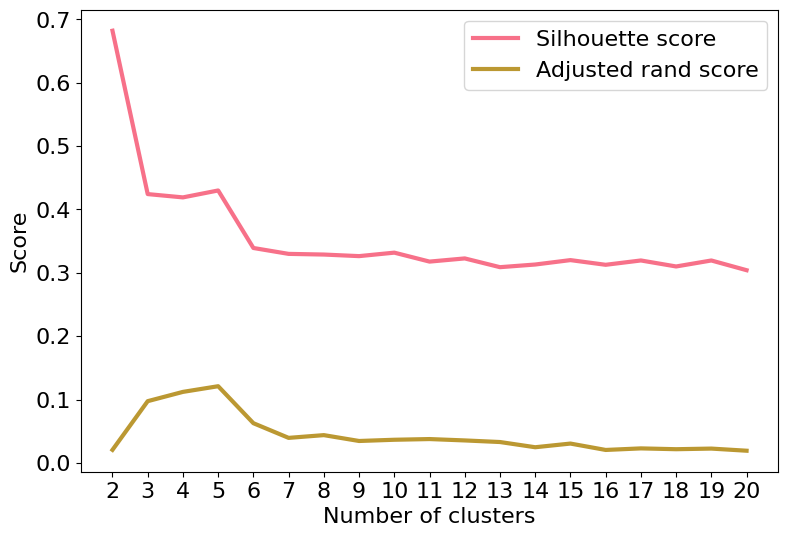

In [50]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

In [58]:
from scipy.cluster.hierarchy import linkage, dendrogram

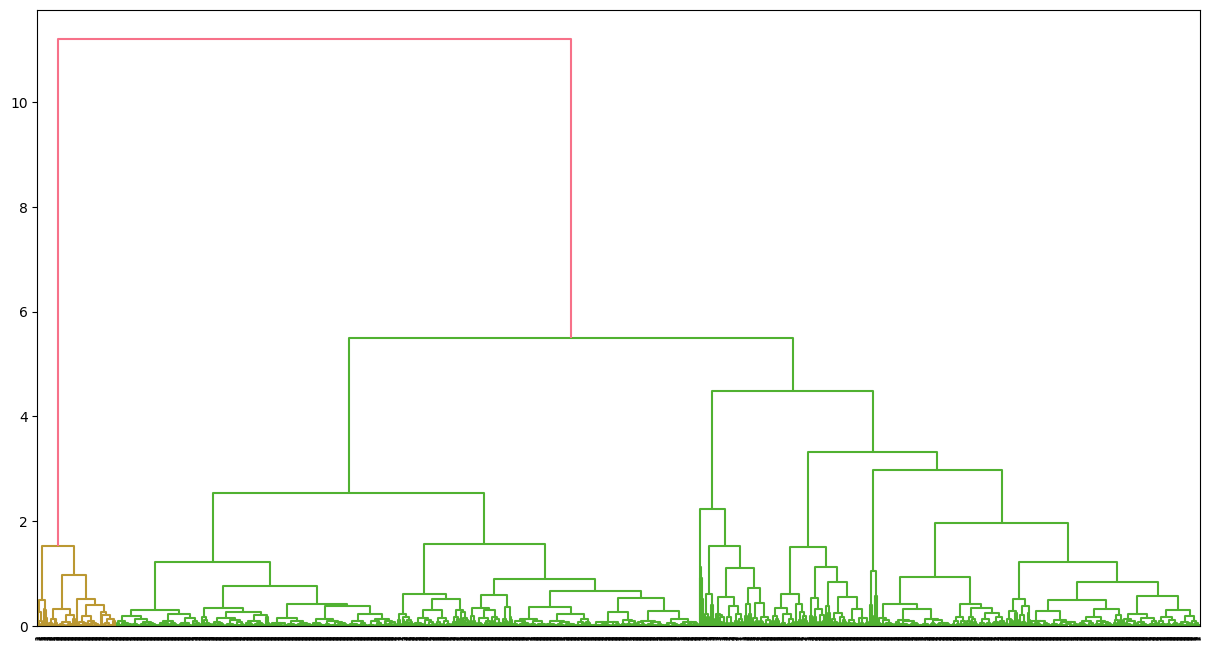

In [59]:
samples = df.values

mergings = linkage(samples, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

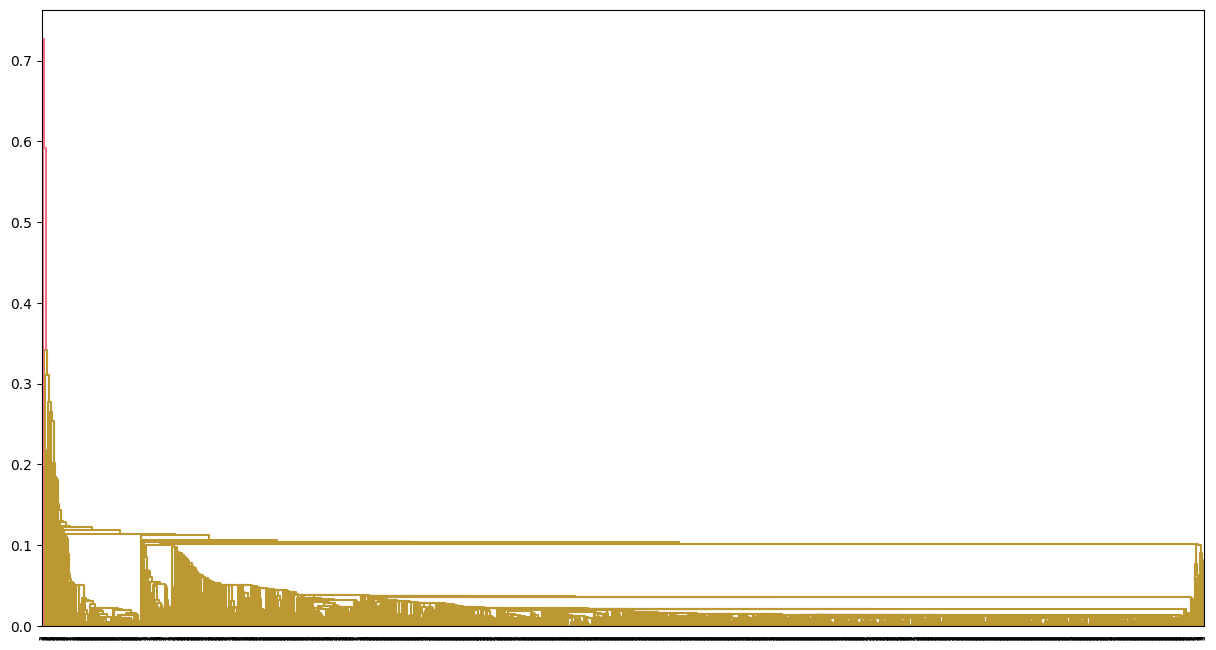

In [60]:
samples = df.values

mergings = linkage(samples, method='single')

plt.figure(figsize=(15, 8))
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

In [61]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import mutual_info_score

In [62]:

mins = X.shape[1]

['#562C2C', '#F2542D', '#F5DFBB', '#0E9594', '#127475', '#FF1053', '#6C6EA0', '#66C7F4', '#C1CAD6', '#FFFFFF', '#462749', '#E086D3', '#9DA3A4', '#604D53', '#5B507A', '#A53860', '#FFA5AB', '#FFBA49', '#06A77D', '#E7A977']


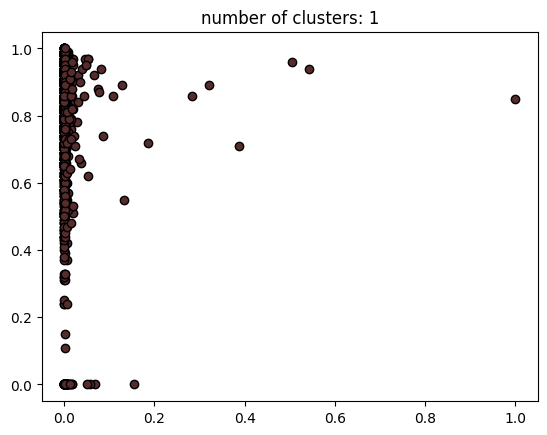

In [65]:
db = DBSCAN(eps=0.8, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = ['#562C2C', '#F2542D', '#F5DFBB', '#0E9594', '#127475', '#FF1053', '#6C6EA0', '#66C7F4', '#C1CAD6', '#FFFFFF', '#462749', '#E086D3', '#9DA3A4', '#604D53', '#5B507A', '#A53860', '#FFA5AB', '#FFBA49', '#06A77D', '#E7A977']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["ncopiesSold"], xy["nreviewScore"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["ncopiesSold"], xy["nreviewScore"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()



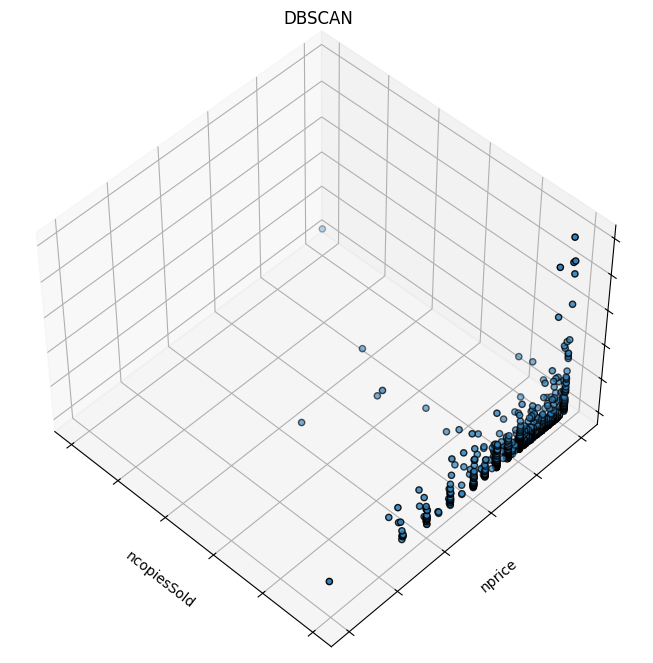

In [67]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["ncopiesSold"], X["nprice"], X["navgPlaytime"], c=labels.astype(float), cmap='tab20c', edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("ncopiesSold")
ax.set_ylabel("nprice")
ax.set_zlabel("navgPlaytime")
ax.set_title("DBSCAN")

plt.show()



In [68]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)



ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)